SETUP [1/2] Instalacja biblioteki

In [ ]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 7.9 MB/s 


SETUP [2/2] Połączenie z GDrive i skopiowanie plików

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
!cp -r drive/MyDrive/zto/lab13-14/* .

Mounted at /content/drive


Front Pareto i HVI

In [ ]:
  def calculate_hvi(repeats, max_iter_case, tasks_count_case):
    hvi = 0
    for _ in range(repeats):
      sa = SA(tasks_count_case, IterationCondition(max_iter_case))
      solutions = sa.solve()
      pareto_frontier = sa.pareto_frontier.get(solutions)
      pareto_frontier_points = [[x, y] for x, y in zip(pareto_frontier[0], pareto_frontier[1])]
      nadir_x, nadir_y = sa.pareto_frontier.get_nadir(multiplier=1.2)
      hyper_volume = hypervolume(pareto_frontier_points)
      hvi += hyper_volume.compute([nadir_x, nadir_y])
    hvi = hvi / repeats
    print(f"Dla maxIter: {max_iter_case}, {tasks_count_case} zadań i {repeats} powtórzeń, współczynnik HVI={hvi}")


# **Badania**

1. Stworzenie dla każdej badanej wartości maxIter wykresu zbiorów P oraz F tak że na osi X
jest wartość pierwszego kryterium, zaś na osi Y drugiego, wraz z zaznaczeniem frontu Pareto.

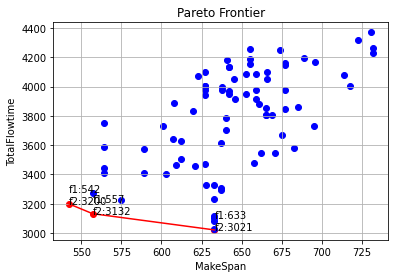

Dla maxIter: 100, 10 zadań i 1 powtórzeń, współczynnik HVI=737099.8799999999
______________________________________________________________________________________


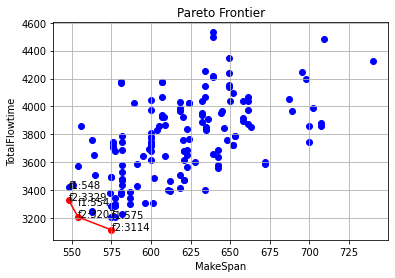

Dla maxIter: 200, 10 zadań i 1 powtórzeń, współczynnik HVI=787052.9999999999
______________________________________________________________________________________


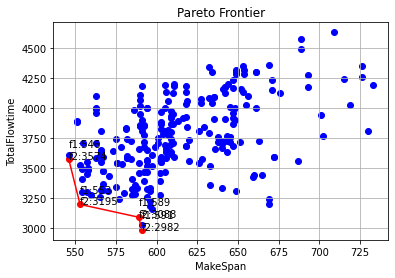

Dla maxIter: 400, 10 zadań i 1 powtórzeń, współczynnik HVI=847463.04
______________________________________________________________________________________


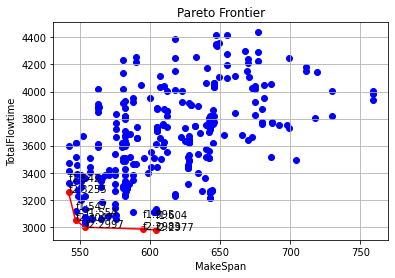

Dla maxIter: 800, 10 zadań i 1 powtórzeń, współczynnik HVI=863409.6799999997
______________________________________________________________________________________


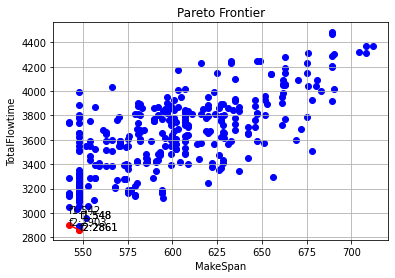

Dla maxIter: 1600, 10 zadań i 1 powtórzeń, współczynnik HVI=786558.6399999998
______________________________________________________________________________________


In [ ]:
from simulated_annealing import SA
from stop_conditions import IterationCondition
from pareto import ParetoFrontier
from pygmo import hypervolume
max_iter_cases = (100, 200, 400, 800, 1600)
tasks_count_cases = [10]
repeats = 1
hvi = 0

for i in max_iter_cases:
  for t in tasks_count_cases:
    calculate_hvi(repeats, i, t)
    print('______________________________________________________________________________________')



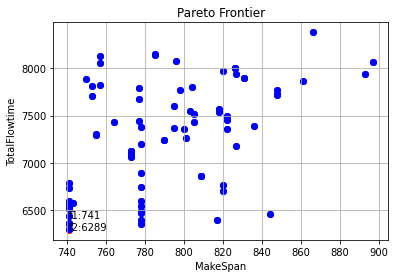

Dla maxIter: 200, 15 zadań i 1 powtórzeń, współczynnik HVI=1264256.7599999993


In [ ]:
calculate_hvi(1, 200, 15)

In [ ]:
from simulated_annealing import SA
from stop_conditions import IterationCondition
from pareto import ParetoFrontier
from pygmo import hypervolume
max_iter_cases = (100, 200, 400, 800, 1600)
tasks_count_cases = [15]
repeats = 1
hvi = 0

for i in max_iter_cases:
  for t in tasks_count_cases:
    calculate_hvi(repeats, i, t)
    print('______________________________________________________________________________________')

NameError: ignored

# Wizualizacja rozwiązań

2. Obliczenie (podanie wartości) współczynnika hiperobjętości (Hyper Volume Indicator, HVI)
dla każdego uzyskanego frontu Pareto (tj. dla każdej badanej wartości maxIter ).

## II Ścieżki wartości


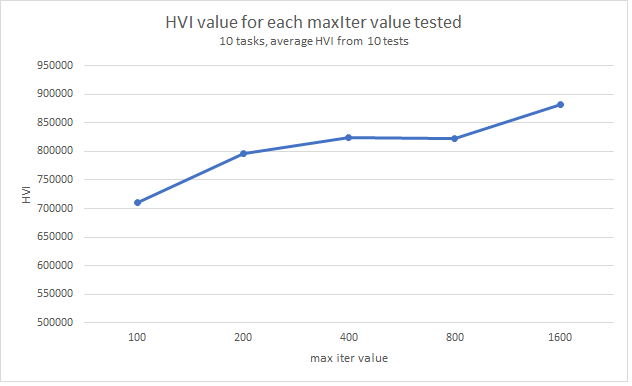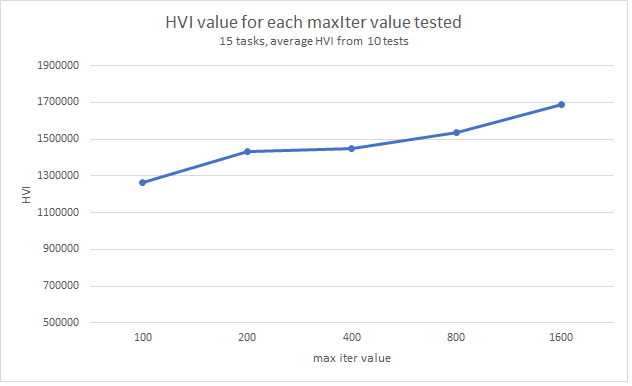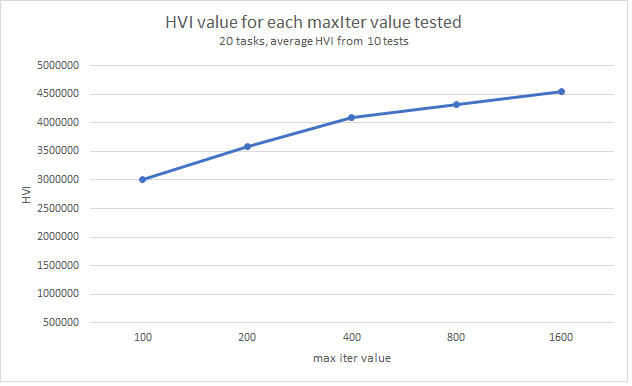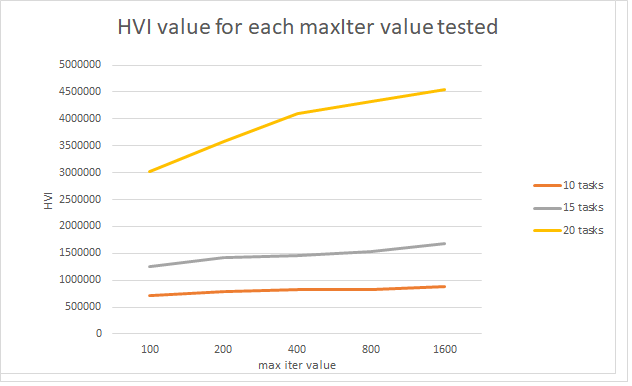